In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
file_path = "C:/Users/문도/Desktop/인지개 자료/diabetes.csv"
df = pd.read_csv(file_path)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 1.0, 'Outcome')

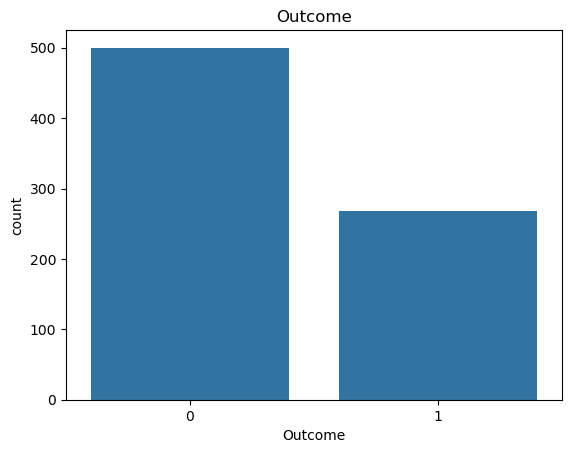

In [11]:
sns.countplot(data=df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("count")
plt.title("Outcome")

In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [14]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
X = df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [18]:
y = df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [19]:
Y = pd.get_dummies(y).values

In [20]:
X = X.values

In [21]:
Y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [23]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1)) # 회귀면 1, 이진분류면(sigmoid) 2, 그 이상은(softmax) 3, 4 ...

model.compile(Adam(learning_rate=0.04),'mse',metrics=['mse']) # 회귀면 mse, 이진분류 그 이상히면 categorical~

model.summary()

F:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 239 (956.00 B)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
import numpy as np

N_EPOCHS = 10
history = model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32, validation_split=0.1) # instead validation_data= (X_test,y_test)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2091 - mse: 0.2091 - val_loss: 0.2115 - val_mse: 0.2115
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1960 - mse: 0.1960 - val_loss: 0.2072 - val_mse: 0.2072
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2004 - mse: 0.2004 - val_loss: 0.2347 - val_mse: 0.2347
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2257 - mse: 0.2257 - val_loss: 0.2083 - val_mse: 0.2083
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1894 - mse: 0.1894 - val_loss: 0.2231 - val_mse: 0.2231
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2144 - mse: 0.2144 - val_loss: 0.2495 - val_mse: 0.2495
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2465 - mse: 0.2465 - val_loss: 0.2789 - val_mse: 0.2789
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2268 - mse: 0.2268 - val_loss: 0.2481 - val_mse: 0.2481
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2393 - mse: 

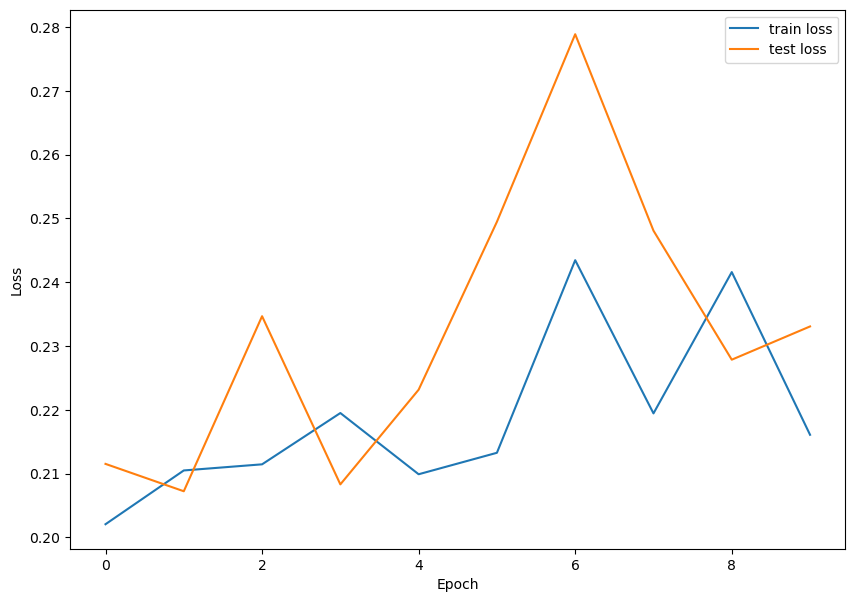

In [35]:
# loss 체크
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2318 - mse: 0.2318 


[0.22925710678100586, 0.22925710678100586]